# HỒI QUY TUYẾN TÍNH
* Xây dựng hàm hồi quy tuyến tính đơn giản
* Xây dựng hàm hồi quy tuyến tính đa biến
* Xây dựng hàm hồi quy tuyến tính hiệu chỉnh (Ridge, Lasso)
* Sử dụng thư viện sklearn 
* from sklearn.linear_model import LinearRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('Data/Advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x=df['TV'].values
#x=df['Newspaper'].values
y=df['Sales'].values

In [5]:
df['X']=x/x.max()
df['Y']=y/y.max()
x=df['X'].values
y=df['Y'].values

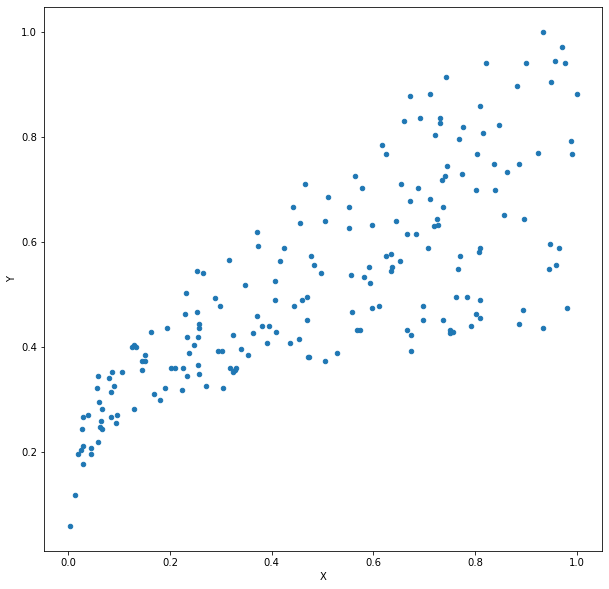

In [6]:
df.plot.scatter(x='X',y='Y',figsize=(10,10))
#plt.figure(figsize=(10,10))
#plt.scatter(x_scale,y_scale)
plt.show()

## Công thức tính các hệ số $\beta_0,\beta_1$
* $\beta_1=\dfrac{\sum\limits_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i=1}^n (x_i-\bar{x})^2}$
* $\beta_0=\bar{y}-\beta_1\bar{x}$

In [7]:
def min_least_squares(x,y):
    x_bar=x.mean()
    y_bar=y.mean()
    x1=x-x_bar
    y1=y-y_bar
    w=sum(x1*y1)/sum(x1*x1)
    b=y_bar-w*x_bar
    return [b,w]

In [8]:
b,w=min_least_squares(x,y)
print(b.round(4),w.round(4))

0.2605 0.5218


## Mô hình hồi quy $y=0.2605+0.5218*x$

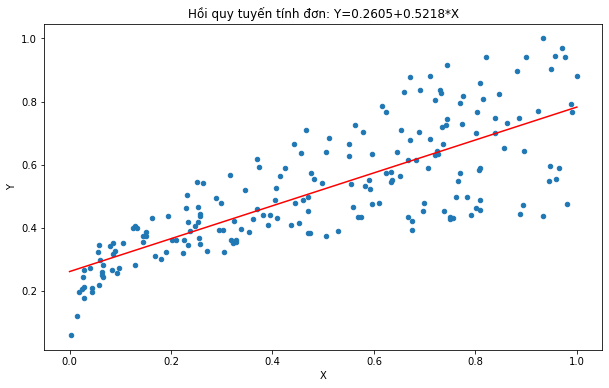

In [9]:
ax1=df.plot.scatter(x='X',y='Y',figsize=(10,6))
x2=np.linspace(0,1,100)
y2=b+w*x2
plt.plot(x2,y2,c='red')
plt.title('Hồi quy tuyến tính đơn: Y=0.2605+0.5218*X')
plt.show()

## Tính chỉ số thống kê $R^2$
* $RSS=\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2$
* $TSS=\sum\limits_{i=1}^n (y_i-\bar{y})^2$ 
* $R^2=1-\dfrac{RSS}{TSS}$

In [10]:
def R2(y_pred,y):
    y_bar=np.mean(y)
    RSS=np.sum((y-y_pred)**2)
    TSS=np.sum((y-y_bar)**2)
    R2=1-RSS/TSS
    return R2

In [11]:
y_pred=b+w*x
#RSS=sum((y-y_hat)**2)
#TSS=sum((y-y.mean())**2)
R2=R2(y_pred,y)
print('R2=',R2.round(4))

R2= 0.6119


In [12]:
#x = np.array([1, 2, 3, 4, 5])
#y = np.array([3, 4, 5, 6, 7])

In [13]:
x=df['X'].values
y=df['Y'].values

In [14]:
x.max(),y.max()

(1.0, 1.0)

In [15]:
def gradient(b,w,x,y):
    y_pred=b+w*x
    error=y-y_pred
    db=-np.mean(error)
    dw=-np.mean(x*error)
    return [db,dw]

In [16]:
def optimize(x,y,num_epochs=1000):   
    b0=0
    w0=0
    lr=0.01
    loss=[]
    for i in range(num_epochs):
        grad=gradient(b0,w0,x,y)
        b1=b0-lr*grad[0]
        w1=w0-lr*grad[1]
        error=np.mean((y-(b1+w1*x))**2)/2
        loss.append(error)
        epsilon=np.abs(b1-b0)+np.abs(w1-w0)
        if epsilon<1e-6:
            break;
        else:
            b0=b1
            w0=w1
    return [b1,w1,loss]

In [17]:
num_epochs=500
b,w,loss=optimize(x,y,num_epochs)

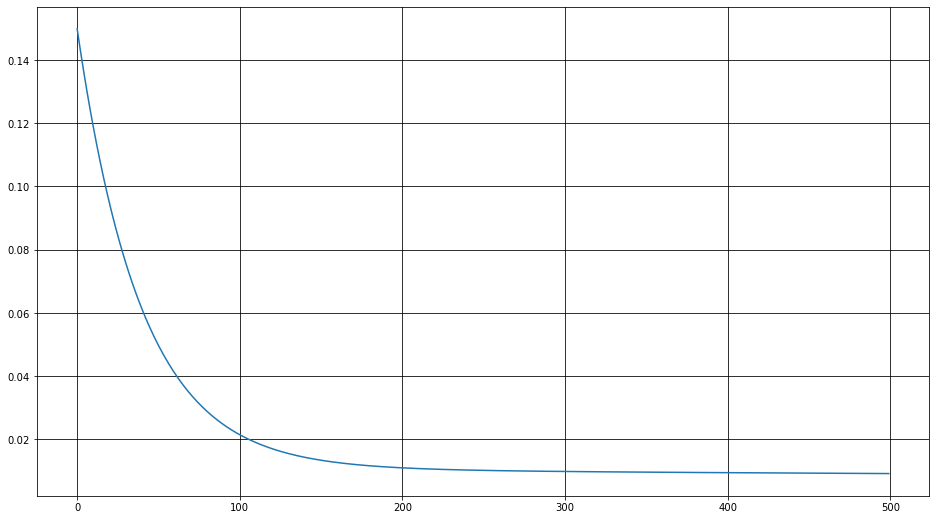

In [18]:
plt.figure(figsize=(16,9))
plt.grid('True', color='k')
plt.plot(loss)
plt.show()

In [19]:
import torch

In [20]:
X=torch.from_numpy(x)
Y=torch.from_numpy(y)

In [21]:
def forward(x):
    y=b+w*x
    return y

In [22]:
def criterion(y_pred, y):
    return torch.mean((y_pred - y)**2)

In [23]:
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

0, 	0.010387036949396133, 	0.006024245638400316, 	0.3068810013717421
1000, 	0.3027554154396057, 	0.44223499298095703, 	0.014958984685965031
2000, 	0.27173760533332825, 	0.5006280541419983, 	0.014458890172155753
3000, 	0.2634705603122711, 	0.5161912441253662, 	0.014423365375507737
4000, 	0.26126721501350403, 	0.5203391909599304, 	0.014420841738165793


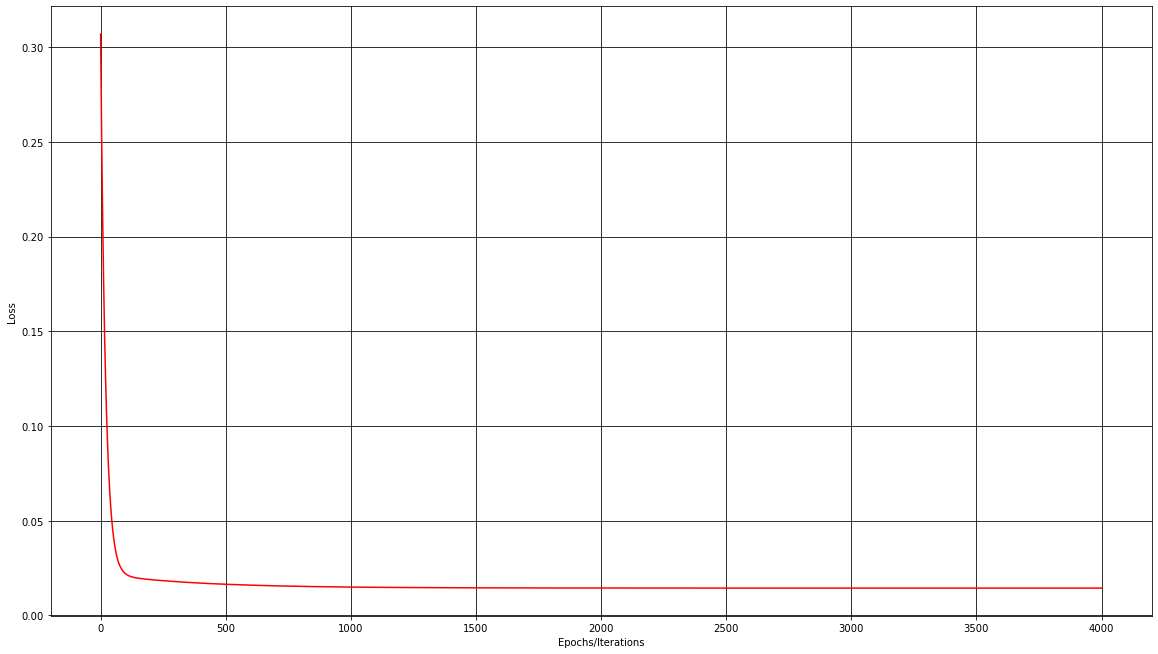

In [24]:
lr = 0.01
loss_list = []
epochs = 4001
 
for epoch in range(epochs):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - lr*w.grad.data
    b.data = b.data - lr*b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    if(epoch%1000==0):
        print('{}, \t{}, \t{}, \t{}'.format(epoch, b.item(), w.item(), loss.item()))
 
# Plotting the loss after each iteration
plt.figure(figsize=(16,9))
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='k')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [25]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset


In [26]:
dataset = TensorDataset(X, Y)

In [27]:
batch_size = 3
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
 
lr = 0.01
loss_list = []
epochs = 201
 
for epoch in range(epochs):    
    for x,y in train_loader:
        y_pred = forward(x)
        loss = criterion(y_pred, y)
        loss_list.append(loss.item())
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    if(epoch%100==0):
            print('{}, \t{}, \t{}, \t{}'.format(epoch, b.item(), w.item(), loss.item()))
 


0, 	-3.4760820865631104, 	-1.2018152475357056, 	22.899087945150832
100, 	0.26120030879974365, 	0.5224610567092896, 	0.022762834355969624
200, 	0.2624070346355438, 	0.5230083465576172, 	0.0133003308903034


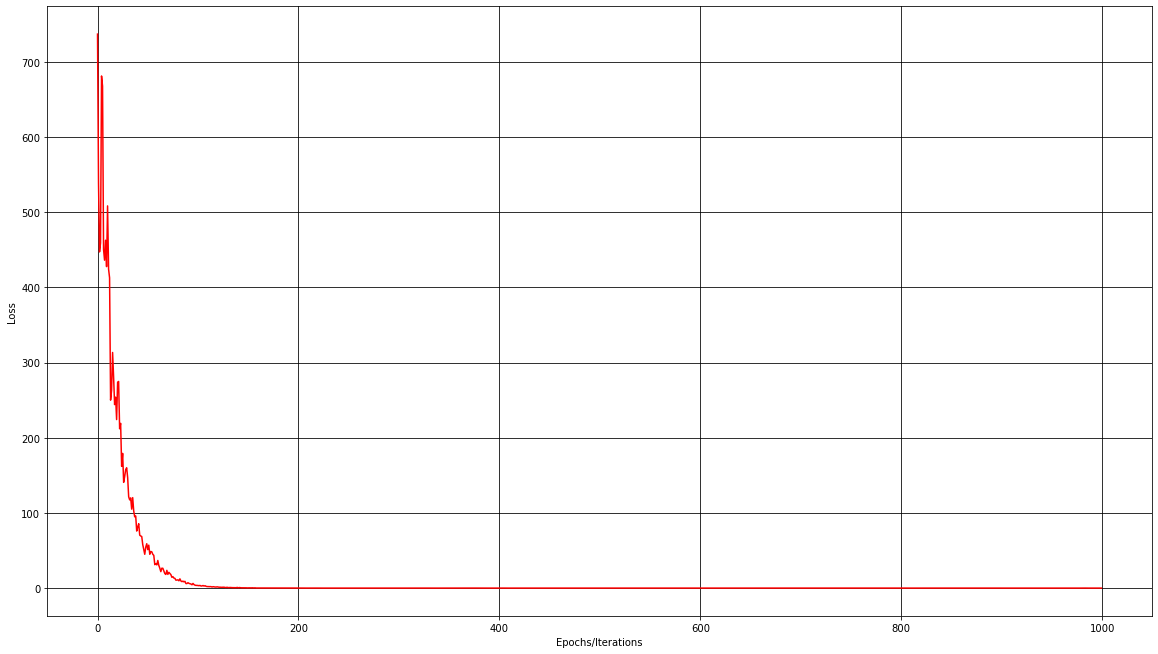

In [28]:
# Plotting the loss after each iteration
plt.figure(figsize=(16,9))
plt.plot(loss_list[:1000], 'r')
plt.tight_layout()
plt.grid('True', color='k')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.savefig('batch_SGD.png')
plt.show()

In [29]:
batch_size = len(dataset)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
 
lr = 0.01
loss_list = []
epochs = 5001
 
for epoch in range(epochs):    
    for x,y in train_loader:
        y_pred = forward(x)
        loss = criterion(y_pred, y)
        loss_list.append(loss.item())
        loss.backward()
        w.data = w.data - lr* w.grad.data
        b.data = b.data - lr* b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    if(epoch%1000==0):
            print('{}, \t{}, \t{}, \t{}'.format(epoch, b.item(), w.item(), loss.item()))
 



0, 	-19.490394592285156, 	-9.729619979858398, 	658.502276077417
1000, 	0.23396438360214233, 	0.5717384815216064, 	0.014632074662211527
2000, 	0.2534030079841614, 	0.5351439714431763, 	0.014435667220107605
3000, 	0.25858384370803833, 	0.5253907442092896, 	0.014421715583971923
4000, 	0.2599642872810364, 	0.5227919220924377, 	0.0144207246111365
5000, 	0.2603309154510498, 	0.522100567817688, 	0.01442065420621062


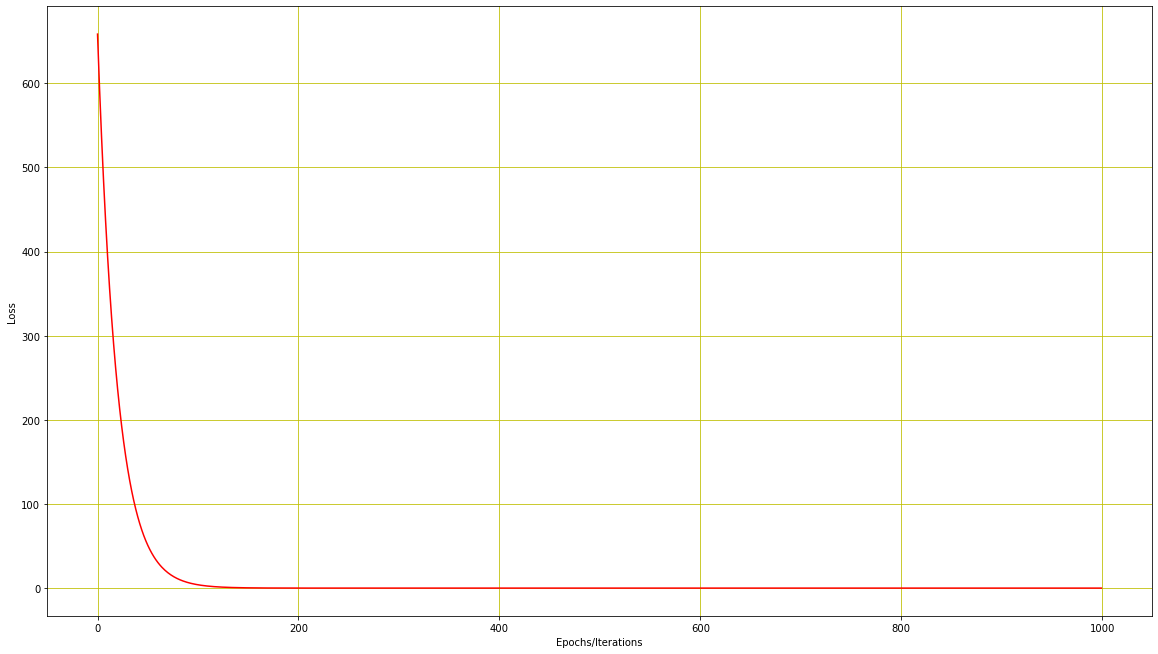

In [30]:
# Plotting the loss after each iteration
plt.figure(figsize=(16,9))
plt.plot(loss_list[:1000], 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.savefig('dataset_SGD.png')
plt.show()

In [34]:
batch_size = 1
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
 
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
 
lr = 0.001
loss_list = []
epochs = 501
 
for epoch in range(epochs):    
    for x,y in train_loader:
        y_pred = forward(X)
        loss = criterion(y_pred, Y)
        loss_list.append(loss.item())
        loss.backward()
        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    if(epoch%100==0):
            print('{}, \t{}, \t{}, \t{}'.format(epoch, b.item(), w.item(), loss.item()))

0, 	0.25999686121940613, 	0.5227306485176086, 	2.884143712132394
100, 	0.26046591997146606, 	0.521847665309906, 	2.884129743680835
200, 	0.26046591997146606, 	0.521847665309906, 	2.884129743680835
300, 	0.26046591997146606, 	0.521847665309906, 	2.884129743680835
400, 	0.26046591997146606, 	0.521847665309906, 	2.884129743680835
500, 	0.26046591997146606, 	0.521847665309906, 	2.884129743680835


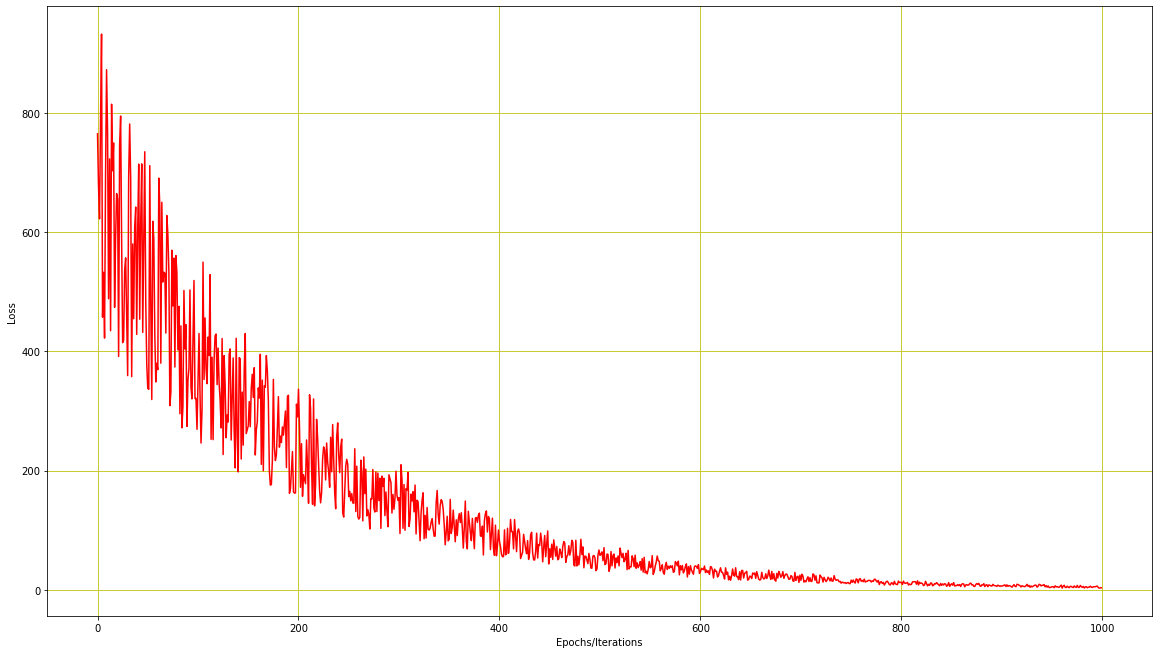

In [32]:
# Plotting the loss after each iteration
plt.figure(figsize=(16,9))
plt.plot(loss_list[:1000], 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.savefig('SGD.png')
plt.show()

In [101]:
x=df['X'].values.reshape(-1,1)
y=df['Y'].values.reshape(-1,1)

In [102]:
from torch.autograd import Variable

In [103]:
X_data = Variable(torch.from_numpy(x).float())
Y_data = Variable(torch.from_numpy(y).float())


In [130]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

    
# our model
our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.001)
 
for epoch in range(201):
    y_pred = our_model(X_data) 
    loss = criterion(y_pred, Y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(epoch%50==0):
        print('epoch: {},weight: {}, bias: {}, loss: {}'.format(
            epoch,
            our_model.state_dict()['linear.weight'].item(),
            our_model.state_dict()['linear.bias'].item(), 
            loss.item()))

epoch: 0,weight: 0.8037183284759521, bias: 0.3806118965148926, loss: 62.081748962402344
epoch: 50,weight: 0.5664138197898865, bias: 0.23679277300834656, loss: 2.919633388519287
epoch: 100,weight: 0.5335258841514587, bias: 0.2542625367641449, loss: 2.8865678310394287
epoch: 150,weight: 0.5249071717262268, bias: 0.2588407099246979, loss: 2.8842971324920654
epoch: 200,weight: 0.5226486325263977, bias: 0.2600404620170593, loss: 2.884141445159912


In [131]:
new_var = Variable(torch.Tensor([[0.5]]))
pred_y = our_model(new_var)
print("predict (after training)", new_var.item(), our_model(new_var).item())

predict (after training) 0.5 0.5213648080825806


In [123]:
reg=LinearRegression()
reg.fit(x.reshape(-1,1),y)
print(reg.intercept_,reg.coef_)
print(reg.score(x.reshape(-1,1),y))

0.2604664277454703 [0.52184667]
0.611875050850071


In [124]:
import statsmodels.api as sm

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [125]:
model=sm.OLS(x.reshape(-1,1),y)
res=model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                   3.52e-100
Time:                        23:05:00   Log-Likelihood:                          54.519
No. Observations:                 200   AIC:                                     -107.0
Df Residuals:                     199   BIC:                                     -103.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Hồi quy tuyến tính đa biến

In [11]:
n=len(df)
print(n)

200


In [12]:
X=np.array([np.ones(n).T,df.TV.values,df.Radio.values,df.Newspaper.values]).T
y=df.Sales.values

In [13]:
X.shape

(200, 4)

In [14]:
y.shape

(200,)

In [15]:
beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

In [16]:
#print('beta=(',round(beta[0],4),round(beta[1],4),round(beta[2],4),round(beta[3],4),')')
beta

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [17]:
y_hat=np.dot(X,beta.T)

In [18]:
RSS=np.sum((y-y_hat)**2)
TSS=np.sum((y-y.mean())**2)
R2=1-RSS/TSS
print(R2)

0.8972106381789522


In [19]:
n=200
p=3

F=((TSS-RSS)/p)/(RSS/(n-p-1))
print(F)

570.2707036590942


### Chia tập huấn luyện và tập kiểm tra

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X.shape, y.shape

((200, 4), (200,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape, y_train.shape

((140, 4), (140,))

In [24]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [25]:
beta=np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,y_train))
#print('beta=(',round(beta[0],4),round(beta[1],4),round(beta[2],4),round(beta[3],4),')')
print(beta.round(4))

[2.7089 0.0441 0.1993 0.0069]


In [26]:
y_hat=np.dot(X_train,beta.T)
RSS=np.sum((y_train-y_hat)**2)
TSS=np.sum((y_train-y_train.mean())**2)
R_train2=1-RSS/TSS
print("R^2 train:=",R_train2)

R^2 train:= 0.9055159502227753


In [27]:
y_hat=np.dot(X_test,beta.T)
RSS=np.sum((y_test-y_hat)**2)
TSS=np.sum((y_test-y_test.mean())**2)
R_test2=1-RSS/TSS
print("R^2 test:=",R_test2)

R^2 test:= 0.8609466508230365


In [28]:
R2_chung=(R_train2+R_test2)/2
print("R^2=",round(R2_chung*100,2),"%")

R^2= 88.32 %


### Tập huấn luyện, tập kiểm tra và tập xác thực

* Chúng ta vẫn quen với việc chia tập dữ liệu ra thành hai tập nhỏ: training data và test data. Và một điều tôi vẫn muốn nhắc lại là khi xây dựng mô hình, ta không được sử dụng test data. Vậy làm cách nào để biết được chất lượng của mô hình với unseen data (tức dữ liệu chưa nhìn thấy bao giờ)?

* Phương pháp đơn giản nhất là trích từ tập training data ra một tập con nhỏ và thực hiện việc đánh giá mô hình trên tập con nhỏ này. Tập con nhỏ được trích ra từ training set này được gọi là validation set. Lúc này, training set là phần còn lại của training set ban đầu. Train error được tính trên training set mới này, và có một khái niệm nữa được định nghĩa tương tự như trên validation error, tức error được tính trên tập validation.

* Ta tìm mô hình sao cho cả train error và validation error đều nhỏ, qua đó có thể dự đoán được rằng test error cũng nhỏ. Phương pháp thường được sử dụng là sử dụng nhiều mô hình khác nhau. Mô hình nào cho validation error nhỏ nhất sẽ là mô hình tốt.

In [29]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [30]:
beta=np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,y_train))
print('beta=(',round(beta[0],4),round(beta[1],4),round(beta[2],4),round(beta[3],4),')')

beta=( 2.7502 0.0443 0.1895 0.0095 )


In [31]:
y_hat=np.dot(X_train,beta.T)
RSS=np.sum((y_train-y_hat)**2)
TSS=np.sum((y_train-y.mean())**2)
R2=1-RSS/TSS
print("R^2 train:=",R2)

R^2 train:= 0.9019787588220786


In [32]:
beta=np.dot(np.linalg.inv(np.dot(X_validation.T,X_validation)),np.dot(X_validation.T,y_validation))
print('beta=(',round(beta[0],4),round(beta[1],4),round(beta[2],4),round(beta[3],4),')')

beta=( 3.8828 0.0308 0.2611 0.0073 )


In [33]:
y_hat=np.dot(X_validation,beta.T)
RSS=np.sum((y_validation-y_hat)**2)
TSS=np.sum((y_validation-y.mean())**2)
R2=1-RSS/TSS
print("R^2 test:=",R2)

R^2 test:= 0.9820854767307288


In [34]:
from sklearn.model_selection import KFold

In [35]:
xx=[1,2,3,4,5,6,7,8,9,10]
kf = KFold(n_splits=5) # Chia thành k=5 folder
for train, val in kf.split(xx):
    print(train,val)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [36]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
kf = KFold(n_splits=5)
for train, validation in kf.split(X_train):
    #print("%s %s" % (len(train), len(test)))
    Xt=X_train[train]
    yt=y_train[train]
    Xv=X_train[validation]
    yv=y_train[validation]
    
    beta=np.dot(np.linalg.inv(np.dot(Xt.T,Xt)),np.dot(Xt.T,yt))
    print('beta=(',round(beta[0],4),round(beta[1],4),round(beta[2],4),round(beta[3],4),')')
    yt_hat=np.dot(Xt,beta.T)
    RSS=np.sum((yt-yt_hat)**2)
    TSS=np.sum((yt-yt.mean())**2)
    Rt2=1-RSS/TSS
    
    yv_hat=np.dot(Xv,beta.T)
    RSS=np.sum((yv-yv_hat)**2)
    TSS=np.sum((yv-yv.mean())**2)
    Rv2=1-RSS/TSS
    
    ytest_hat=np.dot(X_test,beta.T)
    RSS=np.sum((y_test-ytest_hat)**2)
    TSS=np.sum((y_test-y_test.mean())**2)
    Rtest2=1-RSS/TSS    
    print("R^2 train:=",Rt2.round(4), ";  R^2 validation:=", Rv2.round(4), "R^2 test", Rtest2.round(4))
    

beta=( 2.6814 0.0456 0.1793 0.0128 )
R^2 train:= 0.9071 ;  R^2 validation:= 0.8612 R^2 test 0.8696
beta=( 2.7708 0.0448 0.187 0.0083 )
R^2 train:= 0.8978 ;  R^2 validation:= 0.9206 R^2 test 0.8693
beta=( 2.9436 0.0434 0.1952 0.0078 )
R^2 train:= 0.925 ;  R^2 validation:= 0.7732 R^2 test 0.8604
beta=( 2.399 0.0448 0.2023 0.0061 )
R^2 train:= 0.8907 ;  R^2 validation:= 0.9312 R^2 test 0.8606
beta=( 2.9948 0.0432 0.1843 0.0112 )
R^2 train:= 0.8916 ;  R^2 validation:= 0.9294 R^2 test 0.8634


### Thư viện LinearRegression

In [47]:
df=pd.read_csv('Data/Advertising.csv')

In [48]:
X=np.array([df.TV.values,df.Radio.values,df.Newspaper.values]).T
y=df.Sales.values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression

In [39]:
#linear=LinearRegression()

In [51]:
reg = LinearRegression().fit(X_train, y_train)

In [52]:
reg.score(X_train, y_train)

0.9055159502227753

In [53]:
reg.score(X_test, y_test)

0.8609466508230368

In [54]:
reg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [55]:
reg.intercept_

2.7089490925159154

In [56]:
y_hat=reg.predict(X_test)

In [57]:
print(y_hat)

[16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]


## Các vấn đề khác trong mô hình hồi quy tuyến tính

In [58]:
df=pd.read_csv('Data/Credit.csv')

In [61]:
df.shape

(400, 12)

In [63]:
df=df[df.columns[1:]]

In [39]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [65]:
gender=df['Gender']

In [40]:
np.unique(df['Ethnicity'])

array(['African American', 'Asian', 'Caucasian'], dtype=object)

In [41]:
x = pd.get_dummies(df.Ethnicity, prefix='Ethnicity')
print(x.head())

   Ethnicity_African American  Ethnicity_Asian  Ethnicity_Caucasian
0                           0                0                    1
1                           0                1                    0
2                           0                1                    0
3                           0                1                    0
4                           0                0                    1


In [82]:
y=df['Balance'].values

In [83]:
x = pd.get_dummies(df.Gender, prefix='Gender')
print(x.head())

   Gender_Female  Gender_Male
0              0            1
1              1            0
2              0            1
3              1            0
4              0            1


In [84]:
n=len(x)
print(n)

400


In [90]:
X=np.array([np.ones(n).T,x.Gender_Female]).T

In [91]:
X.shape

(400, 2)

In [92]:
beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

In [93]:
print('beta=(',round(beta[0],4),round(beta[1],4),')')

beta=( 509.8031 19.7331 )


In [94]:
print('Biến động số dư ở nữ là:', beta[0]+beta[1]) 
print('Biến động số dư ở nam là:', beta[0]) 

Biến động số dư ở nữ là: 529.5362318840579
Biến động số dư ở nam là: 509.80310880828995


In [96]:
x_dum = pd.get_dummies(df.Ethnicity, prefix='E')
print(x_dum.head())

   E_African American  E_Asian  E_Caucasian
0                   0        0            1
1                   0        1            0
2                   0        1            0
3                   0        1            0
4                   0        0            1


## Mở rộng mô tình tuyến tính

In [97]:
df=pd.read_csv('Data/Advertising.csv')

In [98]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [99]:
n=len(df)
X=np.array([np.ones(n).T,df.TV,df.radio,df.TV*df.radio]).T

In [100]:
X.shape

(200, 4)

In [101]:
y=df.sales

In [102]:
beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

In [103]:
print(beta)

[6.75022020e+00 1.91010738e-02 2.88603399e-02 1.08649470e-03]


In [104]:
print('beta=(',round(beta[0],4),round(beta[1],4),round(beta[2],4),round(beta[3],4),')')

beta=( 6.7502 0.0191 0.0289 0.0011 )
